In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

#importation des données à entrainer et des données pour tester le système x représentent les photos et y le correspondant à
#chaque photo de x
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

#permet de vérifier si les dimensions des entrées importées sont bonnes ou pas
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

#normalisation des données photos
x_train = x_train/255.0
x_test = x_test/255.0

#création de noms pour chaque classes
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

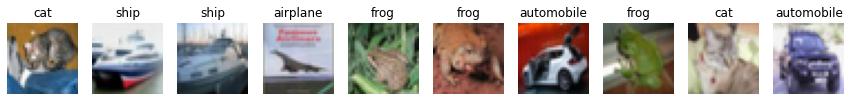

In [2]:
plt.figure(figsize=(15,15))
for i in range(10) : 
    ax = plt.subplot(1, 10, i + 1)
    plt.imshow(x_test[i])
    plt.title(class_names[y_test[i][0]])
    plt.axis("off")

In [3]:
model = keras.models.Sequential([
    keras.layers.RandomFlip("horizontal", input_shape=(32, 32, 3)),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),

    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(16, 3, activation="relu", padding="valid"),
    
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, 3, activation="relu", padding="valid"),
    keras.layers.MaxPooling2D(2),
    
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, 3, activation="relu", padding="valid"),
    keras.layers.MaxPooling2D(2),
    
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, 3, activation="relu", padding="valid"),
    keras.layers.MaxPooling2D(2),
    
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile()

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 32, 32, 3)         0         
                                                                 
 random_rotation (RandomRota  (None, 32, 32, 3)        0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 32, 32, 3)         0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 3)        12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 dropout (Dropout)           (None, 30, 30, 16)        0

In [5]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate = 0.3), metrics=["accuracy"])

In [ ]:
callbacks = [
             keras.callbacks.ModelCheckpoint("best_model2.keras",
                                             save_best_only = True),
]
history = model.fit(x_train, y_train, epochs=300, batch_size=1024, validation_data=(x_test,y_test), verbose=1, callbacks = callbacks)

Epoch 1/300
49/49 [==============================] - 6s 49ms/step - loss: 2.0270 - accuracy: 0.2669 - val_loss: 2.2319 - val_accuracy: 0.1722
Epoch 2/300
49/49 [==============================] - 2s 33ms/step - loss: 1.7151 - accuracy: 0.3713 - val_loss: 2.3517 - val_accuracy: 0.1955
Epoch 3/300
49/49 [==============================] - 2s 33ms/step - loss: 1.6038 - accuracy: 0.4126 - val_loss: 2.2176 - val_accuracy: 0.2327
Epoch 4/300
49/49 [==============================] - 2s 33ms/step - loss: 1.5339 - accuracy: 0.4391 - val_loss: 2.1966 - val_accuracy: 0.2413
Epoch 5/300
49/49 [==============================] - 2s 33ms/step - loss: 1.4875 - accuracy: 0.4578 - val_loss: 1.7000 - val_accuracy: 0.3830
Epoch 6/300
49/49 [==============================] - 2s 33ms/step - loss: 1.4450 - accuracy: 0.4744 - val_loss: 1.3395 - val_accuracy: 0.5203
Epoch 7/300
49/49 [==============================] - 2s 33ms/step - loss: 1.4002 - accuracy: 0.4901 - val_loss: 1.3356 - val_accuracy: 0.5166
Epoch 

49/49 [==============================] - 2s 34ms/step - loss: 0.7818 - accuracy: 0.7245 - val_loss: 0.7230 - val_accuracy: 0.7491
Epoch 59/300
49/49 [==============================] - 2s 32ms/step - loss: 0.7788 - accuracy: 0.7263 - val_loss: 0.6955 - val_accuracy: 0.7619
Epoch 60/300
49/49 [==============================] - 2s 35ms/step - loss: 0.7687 - accuracy: 0.7288 - val_loss: 0.7478 - val_accuracy: 0.7464
Epoch 61/300
49/49 [==============================] - 2s 32ms/step - loss: 0.7636 - accuracy: 0.7309 - val_loss: 0.7282 - val_accuracy: 0.7526
Epoch 62/300
49/49 [==============================] - 2s 32ms/step - loss: 0.7677 - accuracy: 0.7289 - val_loss: 0.7409 - val_accuracy: 0.7465
Epoch 63/300
49/49 [==============================] - 2s 32ms/step - loss: 0.7662 - accuracy: 0.7311 - val_loss: 0.7624 - val_accuracy: 0.7439
Epoch 64/300
49/49 [==============================] - 2s 32ms/step - loss: 0.7530 - accuracy: 0.7372 - val_loss: 0.7025 - val_accuracy: 0.7602
Epoch 65/300

49/49 [==============================] - 2s 31ms/step - loss: 0.6396 - accuracy: 0.7756 - val_loss: 0.6410 - val_accuracy: 0.7870
Epoch 116/300
49/49 [==============================] - 2s 33ms/step - loss: 0.6385 - accuracy: 0.7752 - val_loss: 0.6197 - val_accuracy: 0.7889
Epoch 117/300
49/49 [==============================] - 2s 31ms/step - loss: 0.6322 - accuracy: 0.7789 - val_loss: 0.6417 - val_accuracy: 0.7864
Epoch 118/300
49/49 [==============================] - 2s 31ms/step - loss: 0.6312 - accuracy: 0.7776 - val_loss: 0.6985 - val_accuracy: 0.7686
Epoch 119/300
49/49 [==============================] - 2s 31ms/step - loss: 0.6331 - accuracy: 0.7771 - val_loss: 0.6662 - val_accuracy: 0.7781
Epoch 120/300
49/49 [==============================] - 2s 31ms/step - loss: 0.6375 - accuracy: 0.7769 - val_loss: 0.6638 - val_accuracy: 0.7770
Epoch 121/300
49/49 [==============================] - 2s 32ms/step - loss: 0.6306 - accuracy: 0.7767 - val_loss: 0.6533 - val_accuracy: 0.7804
Epoch 

Epoch 172/300
49/49 [==============================] - 2s 32ms/step - loss: 0.5744 - accuracy: 0.7977 - val_loss: 0.6054 - val_accuracy: 0.8012
Epoch 173/300
49/49 [==============================] - 2s 32ms/step - loss: 0.5700 - accuracy: 0.7983 - val_loss: 0.6034 - val_accuracy: 0.7973
Epoch 174/300
49/49 [==============================] - 2s 31ms/step - loss: 0.5667 - accuracy: 0.8001 - val_loss: 0.6403 - val_accuracy: 0.7897
Epoch 175/300
49/49 [==============================] - 2s 32ms/step - loss: 0.5675 - accuracy: 0.7989 - val_loss: 0.6209 - val_accuracy: 0.7973
Epoch 176/300
49/49 [==============================] - 2s 32ms/step - loss: 0.5743 - accuracy: 0.7967 - val_loss: 0.6744 - val_accuracy: 0.7837
Epoch 177/300
49/49 [==============================] - 2s 32ms/step - loss: 0.5704 - accuracy: 0.7985 - val_loss: 0.6198 - val_accuracy: 0.7959
Epoch 178/300
49/49 [==============================] - 2s 32ms/step - loss: 0.5694 - accuracy: 0.7985 - val_loss: 0.5792 - val_accuracy:

Epoch 229/300
49/49 [==============================] - 2s 32ms/step - loss: 0.5302 - accuracy: 0.8131 - val_loss: 0.6091 - val_accuracy: 0.7971
Epoch 230/300
49/49 [==============================] - 2s 31ms/step - loss: 0.5336 - accuracy: 0.8114 - val_loss: 0.5812 - val_accuracy: 0.8072
Epoch 231/300
49/49 [==============================] - 2s 32ms/step - loss: 0.5440 - accuracy: 0.8063 - val_loss: 0.6077 - val_accuracy: 0.8023
Epoch 232/300
49/49 [==============================] - 2s 32ms/step - loss: 0.5319 - accuracy: 0.8121 - val_loss: 0.5705 - val_accuracy: 0.8108
Epoch 233/300
49/49 [==============================] - 2s 32ms/step - loss: 0.5304 - accuracy: 0.8133 - val_loss: 0.6278 - val_accuracy: 0.7982
Epoch 234/300
49/49 [==============================] - 2s 32ms/step - loss: 0.5354 - accuracy: 0.8115 - val_loss: 0.6231 - val_accuracy: 0.7960
Epoch 235/300
49/49 [==============================] - 2s 32ms/step - loss: 0.5343 - accuracy: 0.8102 - val_loss: 0.5744 - val_accuracy:

Epoch 286/300
49/49 [==============================] - 2s 32ms/step - loss: 0.5009 - accuracy: 0.8216 - val_loss: 0.6060 - val_accuracy: 0.8029
Epoch 287/300
49/49 [==============================] - 2s 32ms/step - loss: 0.5130 - accuracy: 0.8183 - val_loss: 0.5989 - val_accuracy: 0.8049
Epoch 288/300
49/49 [==============================] - 2s 32ms/step - loss: 0.5118 - accuracy: 0.8198 - val_loss: 0.5971 - val_accuracy: 0.8093
Epoch 289/300
49/49 [==============================] - 2s 32ms/step - loss: 0.5069 - accuracy: 0.8197 - val_loss: 0.6457 - val_accuracy: 0.7912
Epoch 290/300
49/49 [==============================] - 2s 32ms/step - loss: 0.5129 - accuracy: 0.8188 - val_loss: 0.5775 - val_accuracy: 0.8083
Epoch 291/300
49/49 [==============================] - 2s 32ms/step - loss: 0.5062 - accuracy: 0.8210 - val_loss: 0.6669 - val_accuracy: 0.7914
Epoch 292/300
49/49 [==============================] - 2s 32ms/step - loss: 0.5078 - accuracy: 0.8198 - val_loss: 0.6027 - val_accuracy:

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In [74]:
best_model = keras.models.load_model("best_model2.keras")
best_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5693 - accuracy: 0.8143


[0.5692663788795471, 0.814300000667572]